## Import Librarires

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import joblib

## Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Ostad - Projects/diabetes_dataset.csv')

# Basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

## EDA (Exploratory Data Analysis)

Missing Values Check:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64




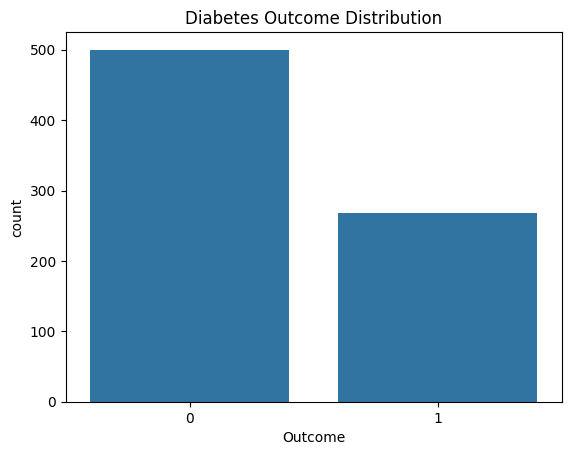

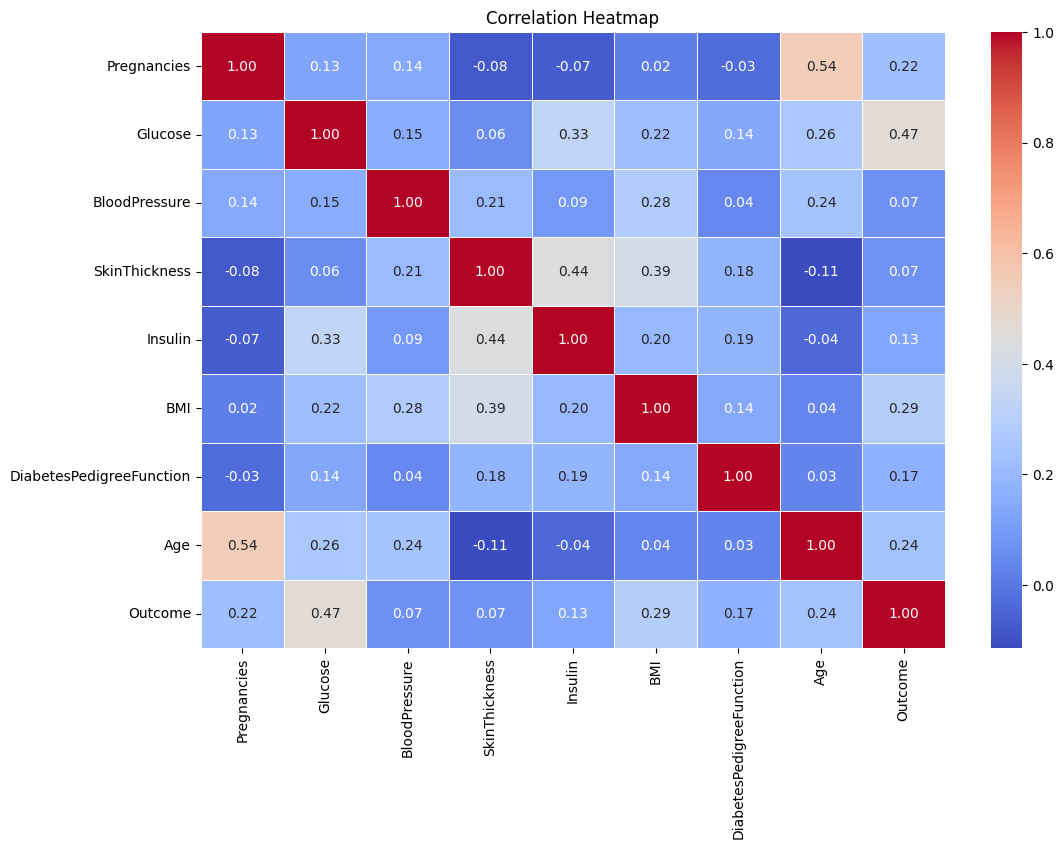

In [4]:
# Checking for missing values
print("Missing Values Check:\n")
print(df.isnull().sum())

# Distribution of target variable
print("\n")
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Correlation heatmap
print("\n")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering & Preprocessing

In [5]:
# Feature engineering
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training

In [6]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # Enable probability estimates for SVC
    #'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Model {name} trained successfully.")

Model Logistic Regression trained successfully.
Model Random Forest trained successfully.
Model SVM trained successfully.
Model KNN trained successfully.


## Model Evaluation

In [7]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Get classification report as dictionary
    class_report = classification_report(y_test, y_pred, output_dict=True)

    # Extract precision, recall, and F1 score for the positive class (class '1')
    precision = class_report['1']['precision']
    recall = class_report['1']['recall']
    f1 = class_report['1']['f1-score']

    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': auc_score
    }

# Display results in a dataframe
results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.753247   0.649123  0.672727  0.660714  0.814692
Random Forest        0.779221   0.684211  0.709091  0.696429  0.828283
SVM                  0.733766   0.645833  0.563636  0.601942  0.805051
KNN                  0.694805   0.583333  0.509091  0.543689  0.764096


## Classification Report

In [8]:
from sklearn.metrics import classification_report

# Generate and display the classification report for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        99
           1       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

--------------------------------------------------
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1    

## Confusion Matrix

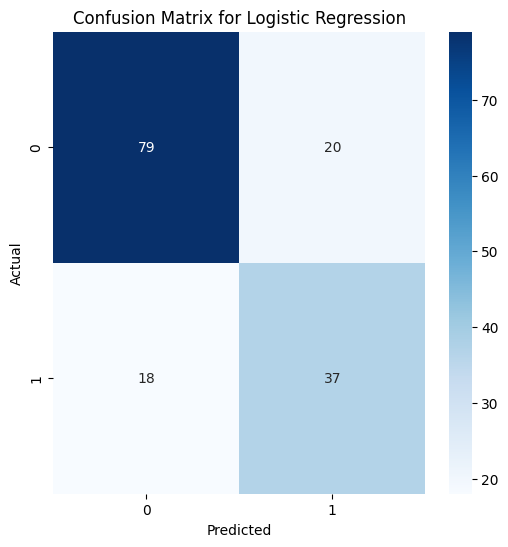

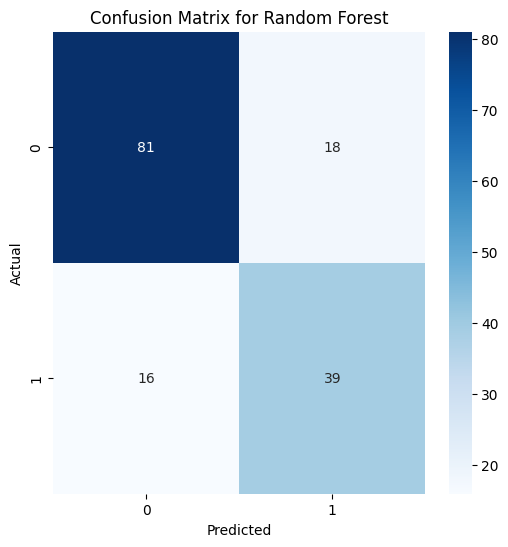

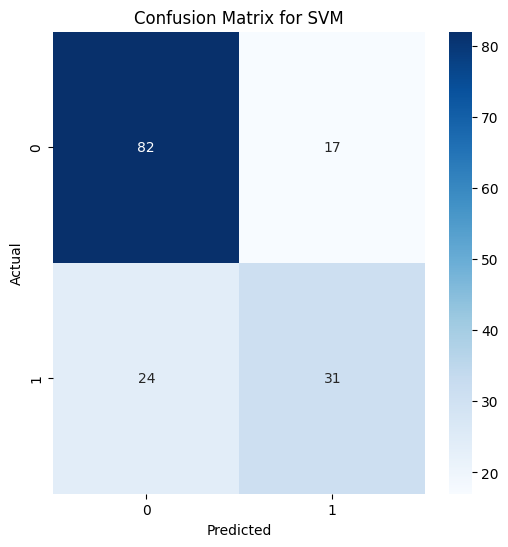

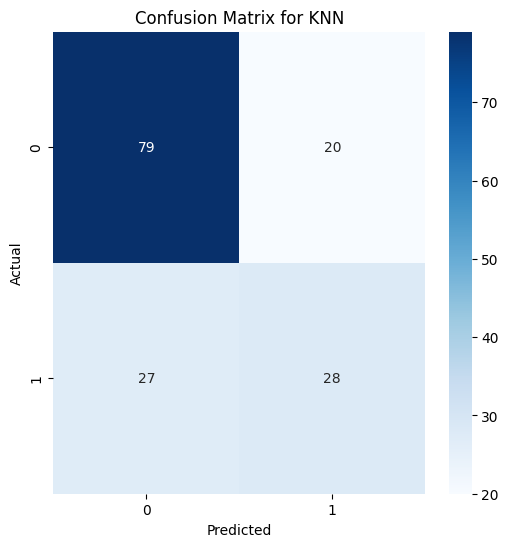

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## ROC-AUC Curve

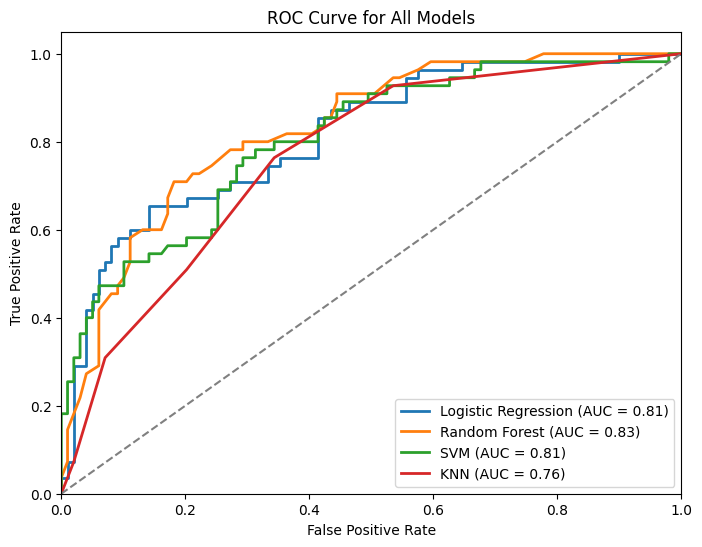

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize plot
plt.figure(figsize=(8, 6))

# Plot the ROC-AUC curve for each model
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()

## Model Save (Best)

In [11]:
# Identify and save the best model
best_model_name = results_df['Accuracy'].idxmax()
best_model = models[best_model_name]
print(f"The best model is: {best_model_name}")

# Ensure the model is fitted on the training split before saving/metricing
if not hasattr(best_model, "classes_"):
    best_model.fit(X_train, y_train)

# Evaluate on the held-out test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
y_pred = best_model.predict(X_test)

roc_auc = None
if hasattr(best_model, "predict_proba"):
    y_prob = best_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
elif hasattr(best_model, "decision_function"):
    scores = best_model.decision_function(X_test)
    roc_auc = roc_auc_score(y_test, scores)

metrics_dict = {
    "accuracy": float(accuracy_score(y_test, y_pred)),
    "precision": float(precision_score(y_test, y_pred, zero_division=0)),
    "recall": float(recall_score(y_test, y_pred, zero_division=0)),
    "f1_score": float(f1_score(y_test, y_pred, zero_division=0)),
    "roc_auc": float(roc_auc) if roc_auc is not None else None,
}

# Save model, metrics, and the exact test split
import joblib, numpy as np
model_path   = '/content/drive/MyDrive/Ostad - Projects/diabetes_model.pkl'
metrics_path = '/content/drive/MyDrive/Ostad - Projects/diabetes_metrics.pkl'
test_path    = '/content/drive/MyDrive/Ostad - Projects/diabetes_test.npz'

joblib.dump(best_model, model_path)
joblib.dump(metrics_dict, metrics_path)
np.savez(test_path, X=X_test, y=y_test)

print(f"Best model saved to {model_path}")
print(f"Test metrics saved to {metrics_path}: {metrics_dict}")
print(f"Test split saved to {test_path} (X, y)")

The best model is: Random Forest
Best model saved to /content/drive/MyDrive/Ostad - Projects/diabetes_model.pkl
Test metrics saved to /content/drive/MyDrive/Ostad - Projects/diabetes_metrics.pkl: {'accuracy': 0.7792207792207793, 'precision': 0.6842105263157895, 'recall': 0.7090909090909091, 'f1_score': 0.6964285714285714, 'roc_auc': 0.8282828282828283}
Test split saved to /content/drive/MyDrive/Ostad - Projects/diabetes_test.npz (X, y)
